# Учебный проект: Анализ бизнес-показателей приложения Procrastinate Pro+

Развлекательное приложение Procrastinate Pro+ имеет огромные вложения в рекламу, но несмотря на это последние несколько месяцев терпит убытки. 
В нашем рапоряжении данные о пользователях, привлеченных с 1 мая по 27 октября 2019 года. Проанализируем эти данные и разберемся в причинах убытков, которые мешают компании выйти в плюс.

В ходе исследования проанализируем следующее:

- откуда приходят пользователи и какими устройствами они пользуются

- сколько стоит привлечение пользователей из различных рекламных каналов

- сколько денег приносит каждый клиент

- когда расходы на привлечение клиента окупаются

- какие факторы мешают привлечению клиентов

**Описание данных**

**Структура visits_info_short.csv:**

User Id — уникальный идентификатор пользователя

Region — страна пользователя

Device — тип устройства пользователя

Channel — идентификатор источника перехода

Session Start — дата и время начала сессии

Session End — дата и время окончания сессии



**Структура orders_info_short.csv:**

User Id — уникальный идентификатор пользователя

Event Dt — дата и время покупки

Revenue — сумма заказа



**Структура costs_info_short.csv:**

dt — дата проведения рекламной кампании

Channel — идентификатор рекламного источника

costs — расходы на эту кампанию


### Шаг 1. Загрузка данных и подготовка их к анализу

#### 1.1 Загрузка данных

In [1]:
#импортируем библиотеки
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

Прочитаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы visits, orders и costs

In [2]:
#прочитаем датасеты и сохраним их в переменные
try:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
#сохраним изначальный размер датасетов 
old_visits = visits.shape[0]
print('Размер таблицы visits', old_visits)

old_orders = orders.shape[0]
print('Размер таблицы orders', old_orders)

old_costs = costs.shape[0]
print('Размер таблицы costs', old_costs)

Размер таблицы visits 309901
Размер таблицы orders 40212
Размер таблицы costs 1800


Для качественной предобработки данных создадим универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики, поочередно применяя методы head, info, duplicated и isna.

In [4]:
#пропишем функцию
def information(df):
    display(df.head())
    df.info()
    display(df.isna().sum())
    display(df.duplicated().value_counts())

In [5]:
#применим функцию к датафрейму visits
information(visits)

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

False    309901
Name: count, dtype: int64

In [6]:
#применим функцию к датафрейму orders
information(orders)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


User Id     0
Event Dt    0
Revenue     0
dtype: int64

False    40212
Name: count, dtype: int64

In [7]:
#применим функцию к датафрейму costs
information(costs)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


dt         0
Channel    0
costs      0
dtype: int64

False    1800
Name: count, dtype: int64

Универсальная функция показала, что в данных датафреймах нет дубликатах и пропусков.

#### 1.2 Подгатовка данных 

Приведем названия столбцов в стандартный вид: переименуем столбцы в датафреймах, а так же приведем название всех столбцов к нижнему регистру.

In [8]:
visits.rename(columns={'User Id': 'user_id', 'Region': 'region', 'Device': 'device', 'Channel': 'channel', 'Session Start': 'session_start', 'Session End': 'session_end'},  inplace=True)
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [9]:
orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'},  inplace=True)
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'},  inplace=True)
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [11]:
costs.rename(columns={'Channel': 'channel'},  inplace=True)
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


Изменим некорректные типы данных в датафрейме visits, а именно колонку 'user_id' из типа int преобразуем в object, а колонки 'session_start' и 'session_end' в тип даты

In [12]:
#изменим тип с int в object
visits['user_id'] = visits['user_id'].astype(str)

In [13]:
#применим тип даты в колонках Session_Start и Session_End
visits['session_start'] = pd.to_datetime(visits['session_start'], format='%Y-%m-%d %H:%M:%S')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%Y-%m-%d %H:%M:%S')

In [14]:
#выведем на экран информацию о датафрейме visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  object        
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 14.2+ MB


В датафрейме orders изменим тип данных в колонке user_id с int в object, в колонке event_dt пропишем тип даты

In [15]:
#изменим тип с int в object
orders['user_id'] = orders['user_id'].astype(str)

In [16]:
#применим тип даты в колонках Session_Start и Session_End
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y-%m-%d %H:%M:%S')

In [17]:
#выведем на экран информацию о датафрейме orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  object        
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 942.6+ KB


Колонку 'dt' в датафрейме costs приведем к формату даты

In [18]:
#применим тип даты в колонке dt
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


____________________

**Подведем итоги первого шага исследования.**

Итак, в первом пункте данного анализа были изучены данные и выполнена их предобработка. 
Универсальная функция  information(df) показала, что в данных отсутствуют пропуски и дубликаты.

Для удобства были переименованы следующие столбцы:
- столбцы датафрейма visits из User Id, Session Start, Session End в user_id, session_start, session_end
- столбцы датафрейма orders из User, Event в user_id, event_Dt

Так же названия всех столбцов в трех датафремах были приведены к нижнему регистру.

Изменили некорректные типы данных:
- в датафрейме visits колонку 'user_id' из типа int преобразовали в object, а колонки 'session_start' и 'session_end' из типа oblect в тип даты
- в датафрейме orders изменили тип данных в колонке user_id с int в object, в колонке event_Dt прописали корректный тип даты
- в датафреме costs колонку 'dt' привели к формату даты


__________

### Шаг 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Пропишем функции для удобства проведения дальнейшего анализа.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### 2.1 Функции для вычисления значений метрик

Соберём функции для создания профилей, расчёта удержания, конверсии, LTV и ROI (использованы уже написанные раннее в учебном пособии функции)

In [20]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'], errors='coerce')
    profiles['month'] = profiles['first_ts'].dt.to_period('M')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [22]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [23]:
# функция для расчёта LTV и ROI 

def get_ltv(
    users,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = users.query('channel != "organic" and dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac= df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### 2.2 Функции для построения графиков

Пропишем функции для визуализации этих метрик — filter_data(), plot_retention(), plot_conversion() и plot_ltv_roi().

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [27]:
# функция для визуализации LTV и ROI ПРАВИЛЬНАЯ

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

Данные функции помогут провести исследовательский анализ данных в следующем пункте.

___________________

**Подведем итоги второго шага исследования.**

В данном шаге были прописаны функции для удобства проведения дальнейшего анализа, к которым мы будем обращаться в шагах три, четыре и пять нашего исследования.

Это функции для вычисления значений метрик и функции для построения графиков.

_________

### Шаг 3. Исследовательский анализ данных

#### 3.1 Профили пользователей по каналам привлечения

Составим профили пользователей и определите минимальную и максимальную даты привлечения пользователей в приложение.
Так же преобразуем данные о времени для дальнейшей работы с ними.

In [28]:
# преобразование данных о времени в трех датафреймах
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Для получения профилей пользователей, вызовем функцию get_profiles(), передав ей данные о посещениях, покупках, событиях и тратах на рекламу приложения Procrastinate Pro+.

In [29]:
# получаем профили пользователей, сохраним их в датафрейме profiles
events = None  # других событий нет, None — чтобы не «сломать» get_profiles()
profiles = get_profiles(visits, orders, events, costs)
print(profiles.head(5)) 

        user_id            first_ts         channel   device         region  \
0  100002830880 2019-10-17 12:25:34         organic  Android  United States   
1   10000484057 2019-06-29 20:23:14  lambdaMediaAds      Mac        Germany   
2  100010021210 2019-07-19 15:29:29         LeapBob       PC             UK   
3  100018706745 2019-10-16 16:19:26          TipTop      Mac  United States   
4  100024199374 2019-08-20 15:46:46         organic  Android  United States   

           dt    month  payer  acquisition_cost  
0  2019-10-17  2019-10  False          0.000000  
1  2019-06-29  2019-06  False          0.700000  
2  2019-07-19  2019-07  False          0.215122  
3  2019-10-16  2019-10  False          3.500000  
4  2019-08-20  2019-08  False          0.000000  


In [30]:
#определим минимальную дату привлечения пользователей 
print('Минимальная дата привлечения пользователей:', profiles['first_ts'].min())

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41


In [31]:
#определим максимальную дату привлечения пользователей 
print('Максимальная дата привлечения пользователей:', profiles['first_ts'].max())

Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Результат — 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить интернет-магазин. 

Узнаем количество привлечённых каждым источником посетителей. Сгруппируем профили по рекламному каналу и посчитаем количество уникальных ID.

In [32]:
#сгруппируем данные по данным channel и посчитаем количество уникальных пользователей
profiles_channel_groupby = profiles.groupby('channel').agg({'user_id': 'nunique'})
profiles_channel_groupby = profiles.sort_values(by='user_id', ascending=False)
profiles_channel_groupby.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
150007,999999563947,2019-10-18 19:57:25,organic,iPhone,United States,2019-10-18,2019-10,False,0.000000
150006,9999813704,2019-08-03 06:41:08,organic,PC,United States,2019-08-03,2019-08,False,0.000000
150005,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09,False,0.205714
150004,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07,False,2.600000
150003,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10,False,0.000000


Для наглядности построим график, отображающий динамику привлечения новых пользователей по каждому из рекламных каналов.

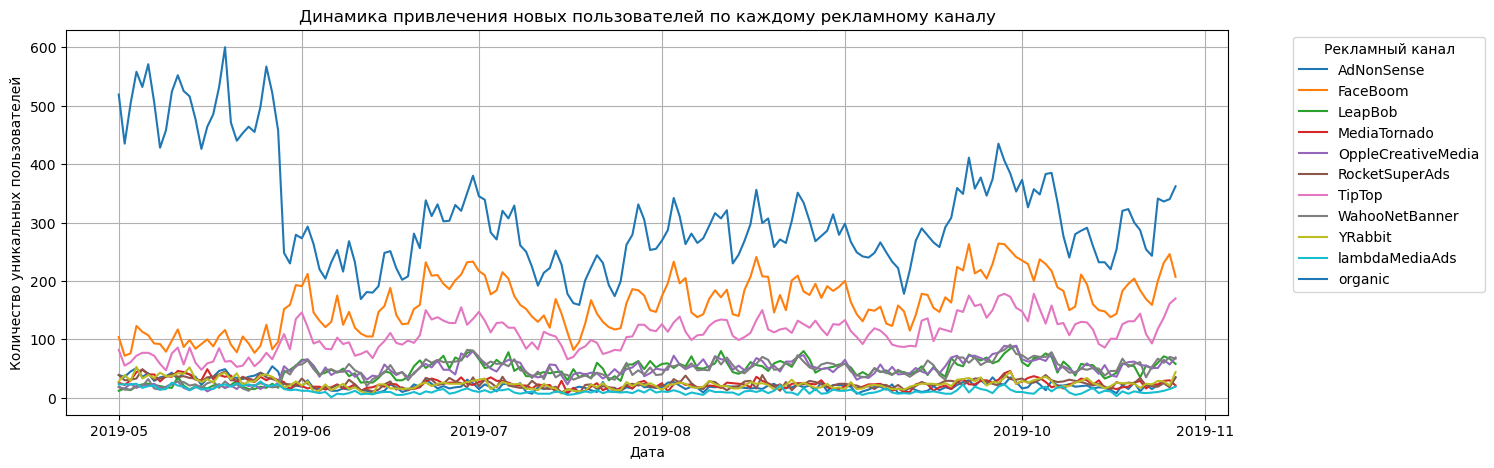

In [33]:
#сгруппируем данные по дате, каналу привлечения и посчитаем количество новых пользователей
profiles_channel_groupby.pivot_table(
    index='dt',  # даты первых посещений
    columns='channel',  # источники переходов
    values='user_id',  # ID пользователей
    aggfunc='nunique'  # подсчёт уникальных значений
).plot(figsize=(15, 5), grid=True)

# добавим подписи к осям
plt.xlabel('Дата')  # подпись оси X
plt.ylabel('Количество уникальных пользователей')  # подпись оси Y

# добавление заголовка к графику
plt.title('Динамика привлечения новых пользователей по каждому рекламному каналу')

# Добавление легенды 
plt.legend(title='Рекламный канал', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

В ходе анализа профиля пользователей была выявлена минимальная дата привлечения пользователей: 2019-05-01 00:00:41
и максимальная дата привлечения пользователей: 2019-10-27 23:59:04.

Данные таблицы profiles_channel_groupby показывают, что чаще всего посетители приходили из источника organic - 56439 пользователей, а реже всего из lambdaMediaAds - 2149 пользователя. 

График показывает, что источники привлечения ведут себя нестабильно, например, самый популярный канал привлечения 'organic' в мае был на пике на отметке 500-600 новых пользователей, в июне показатели резко опустились до отметки 200-400 пользователей.

У каналов 'FaceBoom' и 'LeapBob', которые занимают второе и третье места в таблице profiles_channel_groupby ситуация обратная, в мае показатели были около 100 новых пользователей, а дальше идет скачок до 200 пользователей.

#### 3.2 Профили платящих пользователей по странам

Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [34]:
#построим таблицу, отражающую количество пользователей и долю платящих из каждой страны
print(
    profiles.groupby('region').agg({'payer': 'mean', 'user_id': 'nunique'}).sort_values(by='payer', ascending=False)
)

                  payer  user_id
region                          
United States  0.069019   100002
Germany        0.041119    14981
UK             0.039829    17575
France         0.037994    17450


Итак, по таблице выше наглядно видно, что первое место среди доли платящих пользователей занимает США с долей 0.069019 и с количеством 100002 уникальных id, а последнее место заняла Франция с долей в два раза меньше -  0.037994  и количеством платящих пользователей - 17450.

Стоит так же отметить, что по количеству пользователей ледирует так же США, а вот последнее место по численности занимает Германия.


#### 3.3 Профили платящих пользователей по типу устройства

Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Простроим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [35]:
print(
    profiles.groupby('device').agg({'payer': 'mean', 'user_id': 'nunique'}).sort_values(by='payer', ascending=False)
)


            payer  user_id
device                    
Mac      0.063644    30042
iPhone   0.062079    54479
Android  0.058518    35032
PC       0.050468    30455


По таблице выше можно заметить, что доля платящих пользователей приходится на девайсы компании Apple, а именно на Mac - 0.063644 и iPhone - 0.062079, две последнии строчки занимают девайсы Android и PC.

Так же больше всего пользователей предпочитают пользоваться iPhone, а меньше всего Mac.

#### 3.4 Профили платящих пользователей по источнику привлечения 

Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
print(
    profiles.groupby('channel').agg({'payer': 'mean', 'user_id': 'nunique'}).sort_values(by='payer', ascending=False)
)


                       payer  user_id
channel                              
FaceBoom            0.122049    29144
AdNonSense          0.113402     3880
lambdaMediaAds      0.104700     2149
TipTop              0.096007    19561
RocketSuperAds      0.079137     4448
WahooNetBanner      0.052964     8553
YRabbit             0.038265     4312
MediaTornado        0.035747     4364
LeapBob             0.030633     8553
OppleCreativeMedia  0.027077     8605
organic             0.020553    56439


Топ три канала привлечения среди доли платящих пользователей приходится FaceBoom - 0.122049, AdNonSense - 0.113402 и lambdaMediaAds - 0.104700, наименьшея доля у organic -  0.020553 и OppleCreativeMedia - 0.027077.

Cамый популярный канал по численности пользователей оказался organic (56439 пользователей) - это естественный, органический трафик, что не удивительно, второе место у FaceBoom - 29144, а третье место у TipTop. 
Наименьей популярностью пользуются каналы lambdaMediaAds и AdNonSense.

_________________________________

**Подведем итоги третьего шага исследования.**

Итак, исследовательский анализ данных показал, что количество пользователей равно 150008, минимальная дата привлечения пользователей: 2019-05-01 00:00:41, а максимальная - 2019-10-27 23:59:04.
Чаще всего пользователи приходили из источника organic - 56439 , а реже всего из lambdaMediaAds - 2149 пользователя. 

Так же были проанализированы следующие профили пользователей приложения: 

**Профили платящих пользователей по странам**

Первое место среди доли платящих пользователей занимает США с долей 0.069019, а последнее место заняла Франция с долей в два раза меньше -  0.037994.
По количеству пользователей ледирует так же США, а вот последнее место по численности занимает Германия.

**Профили платящих пользователей по типу устройства**
Доля платящих пользователей приходится на девайсы компании Apple, а именно на Mac - 0.063644 и iPhone - 0.062079, две последнии строчки занимают девайсы Android и PC.
Так же больше всего пользователей предпочитают пользоваться iPhone, а меньше всего Mac.

**Профили платящих пользователей по источнику привлечения**
Топ три канала привлечения среди доли платящих пользователей приходится FaceBoom - 0.122049, AdNonSense - 0.113402 и lambdaMediaAds - 0.104700, наименьшея доля у organic -  0.020553 и OppleCreativeMedia - 0.027077.

Cамый популярный канал по численности пользователей оказался organic (56439 пользователей), а наименьей популярностью пользуются каналы lambdaMediaAds и AdNonSense.

### Шаг 4. Маркетинг

#### 4.1 Маркетинговые расходы

Посчитаем общую сумму расходов на маркетинг.

In [37]:
total_costs = round(sum(costs['costs']))
print('Общая сумма расходов на рекламу равна', total_costs)

Общая сумма расходов на рекламу равна 105497


#### 4.2 Распределение трат по рекламным источникам

Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

Разобьем рекламные расходы по дням и сохраним данные в новой таблице daily_costs

In [38]:

visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])


min_date =  min(costs['dt']) # добавим самую раннюю дату в отчёте в формате datetime
max_date =  max(costs['dt']) # добавим самую позднюю дату в отчёте в формате datetime

# находим количество месяцев в отчёте
days_num = (max_date - min_date).days

# создаём пустую таблицу для рекламных трат
daily_costs = []

# перебираем данные о затратах по источникам
for index, values in costs.iterrows():

    channel_name =  values['channel'] # определим канал привлечения
    channel_costs =  values['costs'] # и общие рекламные траты на него
    avg_channel_costs =  channel_costs/days_num # рассчитаем средние траты за день

    # заполняем таблицу рекламных трат
    for i in range(days_num):
        current_day =  min_date + timedelta(days=i) # рассчитайте текущую дату
        # добавляем строку в таблицу трат
        daily_costs += [[current_day, channel_name, avg_channel_costs]]

# превращаем таблицу рекламных трат в датафрейм
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])

# преобразуем столбец 'dt' в формат даты и времени
daily_costs['dt'] = pd.to_datetime(daily_costs['dt'])

# преобразуем данные о времени
daily_costs['dt'] = daily_costs['dt'].dt.date

daily_costs.head(5)


,dt,channel,costs
0,2019-05-01,FaceBoom,0.632961
1,2019-05-02,FaceBoom,0.632961
2,2019-05-03,FaceBoom,0.632961
3,2019-05-04,FaceBoom,0.632961
4,2019-05-05,FaceBoom,0.632961


Выведем на экран таблицу с группировкой по каналу привлечения и стоимости затрат на маркетинг по каждому каналу, а так же выведем процент, выделенный на каждый источник средств.

In [39]:
costs_pivot = costs.pivot_table(index='channel',values='costs',aggfunc='sum').sort_values(by='costs', ascending=False)
costs_pivot['percent_costs'] = round(100*costs_pivot['costs']/total_costs)
costs_pivot

,costs,percent_costs
channel,,
TipTop,54751.30,52.0
FaceBoom,32445.60,31.0
WahooNetBanner,5151.00,5.0
AdNonSense,3911.25,4.0
OppleCreativeMedia,2151.25,2.0
RocketSuperAds,1833.00,2.0
LeapBob,1797.60,2.0
lambdaMediaAds,1557.60,1.0
MediaTornado,954.48,1.0


Итак, мы видим, что самый дорогов канал по маркетинговым расходам - TipTop, на его долю приходится 54751.30, а самый малозатратный YRabbit - 944.22.
Так же процентное соотношение показывает, что на канал TipTop потрачено больше половины от общего бюджета на маркетинговые расходы. 31% от обшего бюджета тратится на канал FaceBoom, что тоже очень много. На остальные каналы тратится 5 и меньше процентов.
Так же можно заметить, что затраты распределны крайне неравномерно.

#### 4.3 Визуализация динамики изменения расходов во времени 

Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику и отобразим все на одном графике.

In [40]:
#добавим в датафрейм daily_costs столбцы с месяцами и неделями
costs_time = costs
costs_time['dt'] = pd.to_datetime(costs_time['dt'])
costs_time['month'] = costs_time['dt'].dt.month
costs_time['week'] = costs_time['dt'].dt.isocalendar().week
costs_time

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18
...,...,...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0,10,43
1796,2019-10-24,lambdaMediaAds,6.4,10,43
1797,2019-10-25,lambdaMediaAds,8.8,10,43
1798,2019-10-26,lambdaMediaAds,8.8,10,43


In [41]:
#составим две сводные таблицы по месяцам и неделям
costs_time_by_month = costs_time.pivot_table(index=['month'], columns='channel', values='costs', aggfunc='sum')
costs_time_by_week = costs_time.pivot_table(index=['week'], columns='channel', values='costs', aggfunc='sum')

In [42]:
#выведим на экран таблицу по месяца
costs_time_by_month.head(5)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
month,,,,,,,,,,
5,1169.70,3524.4,140.28,238.56,169.75,577.980,2981.0,418.8,299.70,458.4
6,538.65,5501.1,314.58,138.00,370.00,325.715,6675.6,921.0,106.20,199.2
7,504.00,5294.3,313.53,138.48,366.50,252.070,8410.2,851.4,97.38,219.2
8,579.60,6274.4,369.81,154.56,439.25,253.110,11202.0,1040.4,124.74,220.0
9,581.70,6114.9,343.98,144.72,427.75,218.400,13232.5,977.4,152.79,247.2


In [43]:
#выведим на экран таблицу по неделям
costs_time_by_week.head(5)

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds
week,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.2,81.6
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.9,103.2
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.3,90.4
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.4,119.2
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.8,83.2


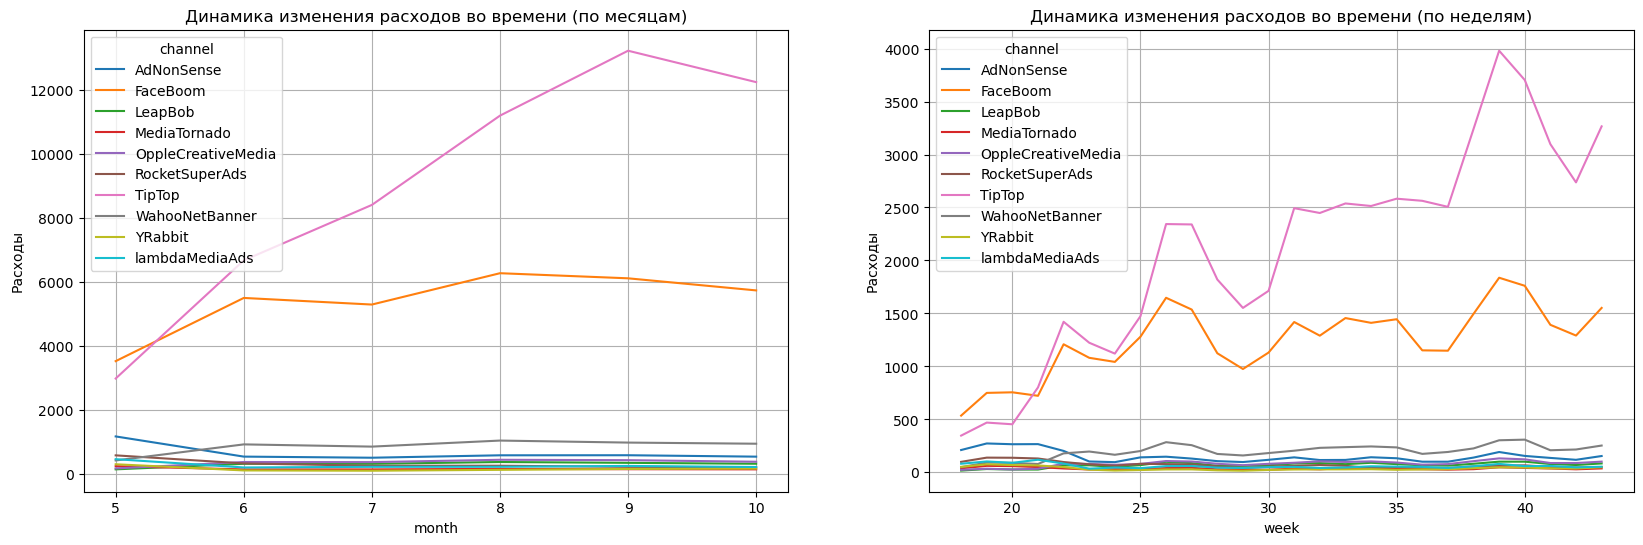

In [44]:
#построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

costs_time_by_month.plot(ax=ax1, grid=True)
ax1.set_ylabel('Расходы')
ax1.set_title('Динамика изменения расходов во времени (по месяцам)')

costs_time_by_week.plot(ax=ax2, grid=True)
ax2.set_ylabel('Расходы')
ax2.set_title('Динамика изменения расходов во времени (по неделям)')

plt.show()


По месячному графику можно сказать, что расходы у TipTop с мая по сентябрь резко увеличились, так же это можно заметить на недельном графике с пиковыми отметками, идущими на возрастание. 
Второй канал по величине расходов - FaceBoom, мы так же можем заметить рост расходов, но не такой резкий как у предыдущего канала.

На остальные каналы тратят намного меньше денег, расходы по ним распределены практически равномерны.


#### 4.4 Расчет стоимости одного пользователя (САС) из каждого источника

Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Для этого будет использовать профили пользователей.


In [45]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того, чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by=['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start': 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns={'session_start': 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещения 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date                                 
    profiles['first_ts'] = pd.to_datetime(profiles['first_ts'], errors='coerce')
    profiles['month'] = profiles['first_ts'].dt.to_period('M')
    ad_costs['dt'] = (costs['dt']).dt.date
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on=['dt', 'channel'], how='left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

In [46]:
# преобразуем данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

users = get_profiles(visits, orders, costs)  # получите профили пользователей
users.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,100002830880,2019-10-17 12:25:34,organic,Android,United States,2019-10-17,2019-10,False,0.000000
1,10000484057,2019-06-29 20:23:14,lambdaMediaAds,Mac,Germany,2019-06-29,2019-06,False,0.700000
2,100010021210,2019-07-19 15:29:29,LeapBob,PC,UK,2019-07-19,2019-07,False,0.215122
3,100018706745,2019-10-16 16:19:26,TipTop,Mac,United States,2019-10-16,2019-10,False,3.500000
4,100024199374,2019-08-20 15:46:46,organic,Android,United States,2019-08-20,2019-08,False,0.000000


Получили таблицу, на которой видно, сколько стоит привлечение одного пользователя (CAC).
Теперь сгруппируем данные по каналам привлечения и получим среднюю стоимость привлечения одного пользователя. 

In [47]:
#сгруппируем таблицу users по каналам привлечения и узнаем, сколько стоит стоимость привлечения одного пользователя
cac = users.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)
cac


,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Органик имеет нулевые затраты, это логично, так как это естественный источник привлечения пользователей.
Самый дорогой канал - это TipTop(что мы уже узнали из графиков), а канал, на который уходит наименьший расход на рекламу - это LeapBob.

**Подведем итоги четвертого шага исследования.**

Общая сумма расходов на маркетинг равна - 105497. Так же была сгруппирована по каналам привлечения и стоимости затрат на маркетинг таблица 'daily_costs', которая показала, что самый дорогой канал - TipTop, на его долю приходится 54751.30, а самый малозатратный YRabbit - 944.22. Все затраты по каналам распределны крайне неравномерно.

Так же были предстпалены два графика с динамиков изменения расходов во времени (по месяцам и неделям). Месячный график показал, что расходы у TipTop и FaceBoom с мая по сентябрь были практически на одном уровне, а в сентяборе начали резко снижаться. Расходы на остальные каналы в 3-4 раза меньше.
На недельном граифке можно заметить, что с нелевой по 20-ю неделю был резкий скачок по тратам, далее траты были на однои уровне, а с 40-й недели расходы начали падать.

Построили таблицу users с помощью профилей пользователей, данная таблица показала, сколько стоит привлечение одного пользователя (CAC). А сгруппированная таблица сас показала, среднюю стоимсоть привлечения одного пользователья, таким оборазом, можно сказаьб, что самый дорогой канал - это TipTop, а канал, на который уходит наименьший расход на рекламу - это LeapBob. 



### Шаг 5. Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. Момент анализа - 1 ноября 2019 года, в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 
Органические пользователи в анализе учавствовать не будут, так как на них нет затрат по маркетингу.

Установим момент и горизонт анализа данных. Момент анализа - 1 ноября 2019 года и зададим двух недельных горизонт анализа.

In [48]:
# посчитаем момент анализа
observation_date = datetime(2019, 11, 1).date()  # момент анализа

# зададим горизонт анализа 
horizon_days = 14 

#### 5.1 Анализ окупаемости рекламы

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

Рассчитаем и визуализируем LTV, вызвав функции get_ltv() и plot_ltv_roi().

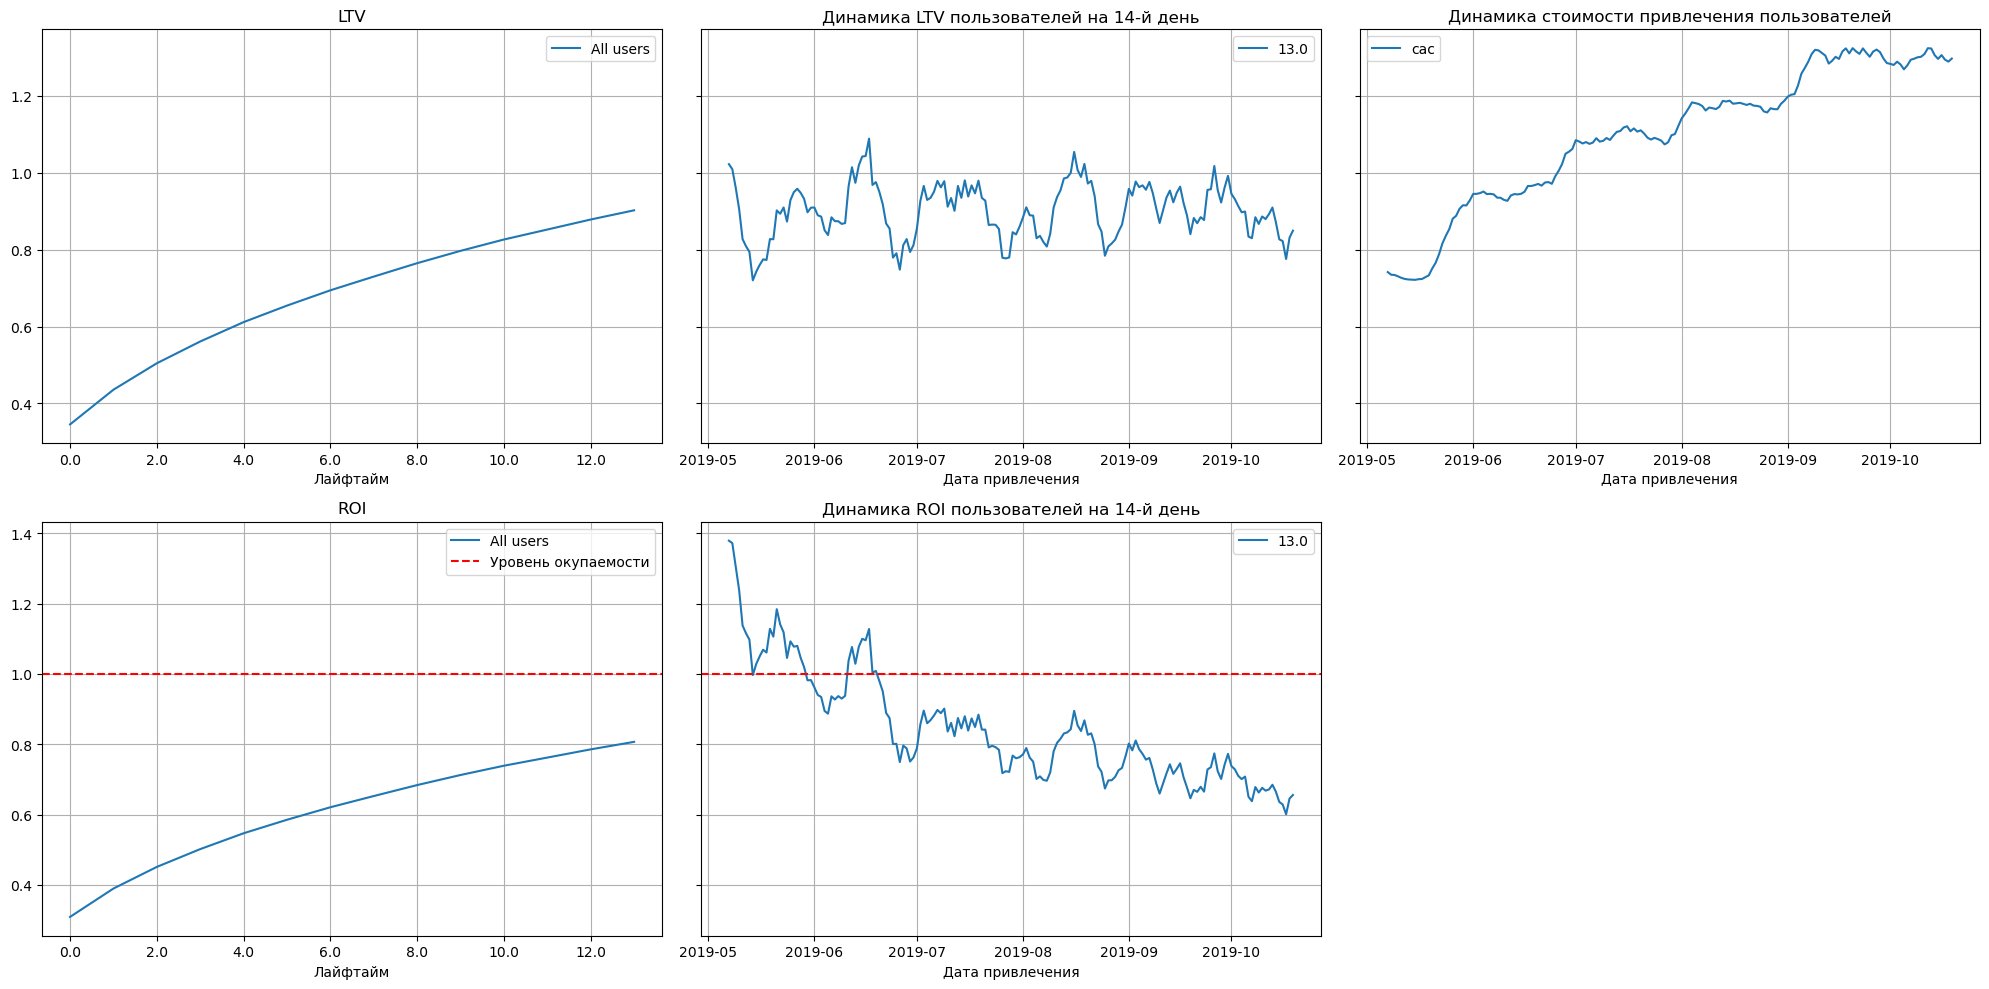

In [49]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать такие выводы:

Реклама не окупается, ROI в конце второй недели чуть выше 80% и ниже линии окупаемости. Динамика ROI так же указывает на то, что данный показатель показатель в самом начале был выше уровня окупаемости, но уже на второй месяц показатель катится ниже окупаемости, то есть компания начинает работать в минус.

CAC нестабилен, это может быть связано с неэффективными маркетинговыми кампаниями и нестабильными затратами. 

Значение LTV меньше 1, это означает, что компания вкладывает большие средства на привлечение и удержание клиентов, но саму прибыль от них не получает.  Динамика 

#### 5.2 Конверсия и удержание пользователей

Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим графики конверсии и удержания.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

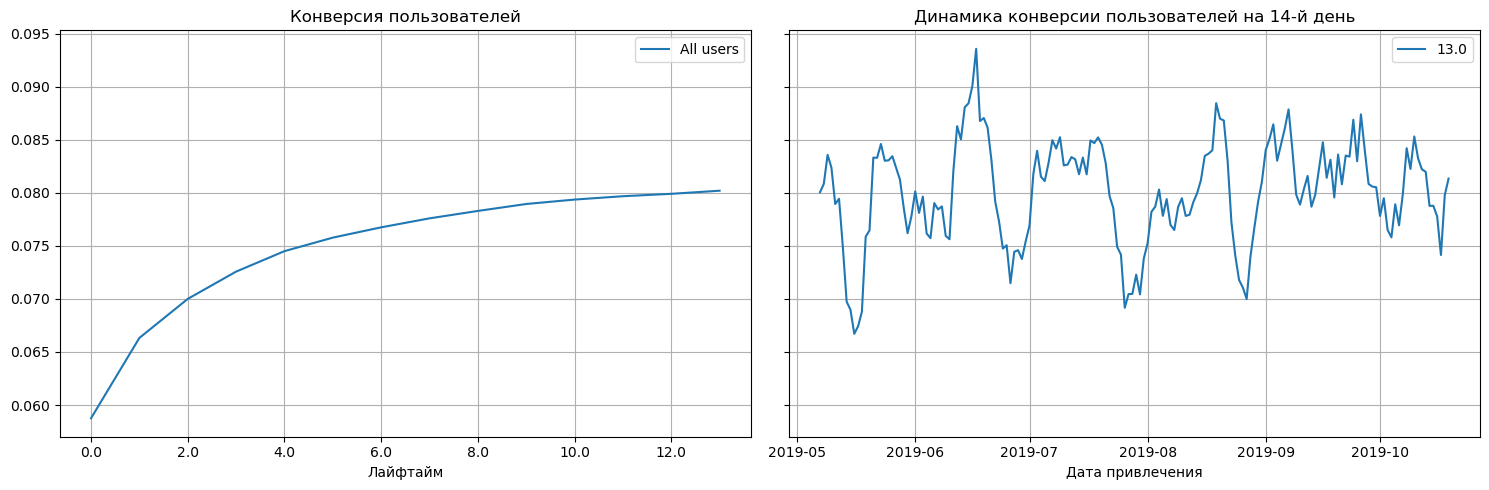

In [50]:
# смотрим конверсию по пользователям
# исключим органических пользователей из расчета конверсии
profiles = profiles[profiles.channel != 'organic']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по двум графикам конверсия растет и пользователи конвертируются постоянно, так как показатели растут. 

Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках удержание пользователей.

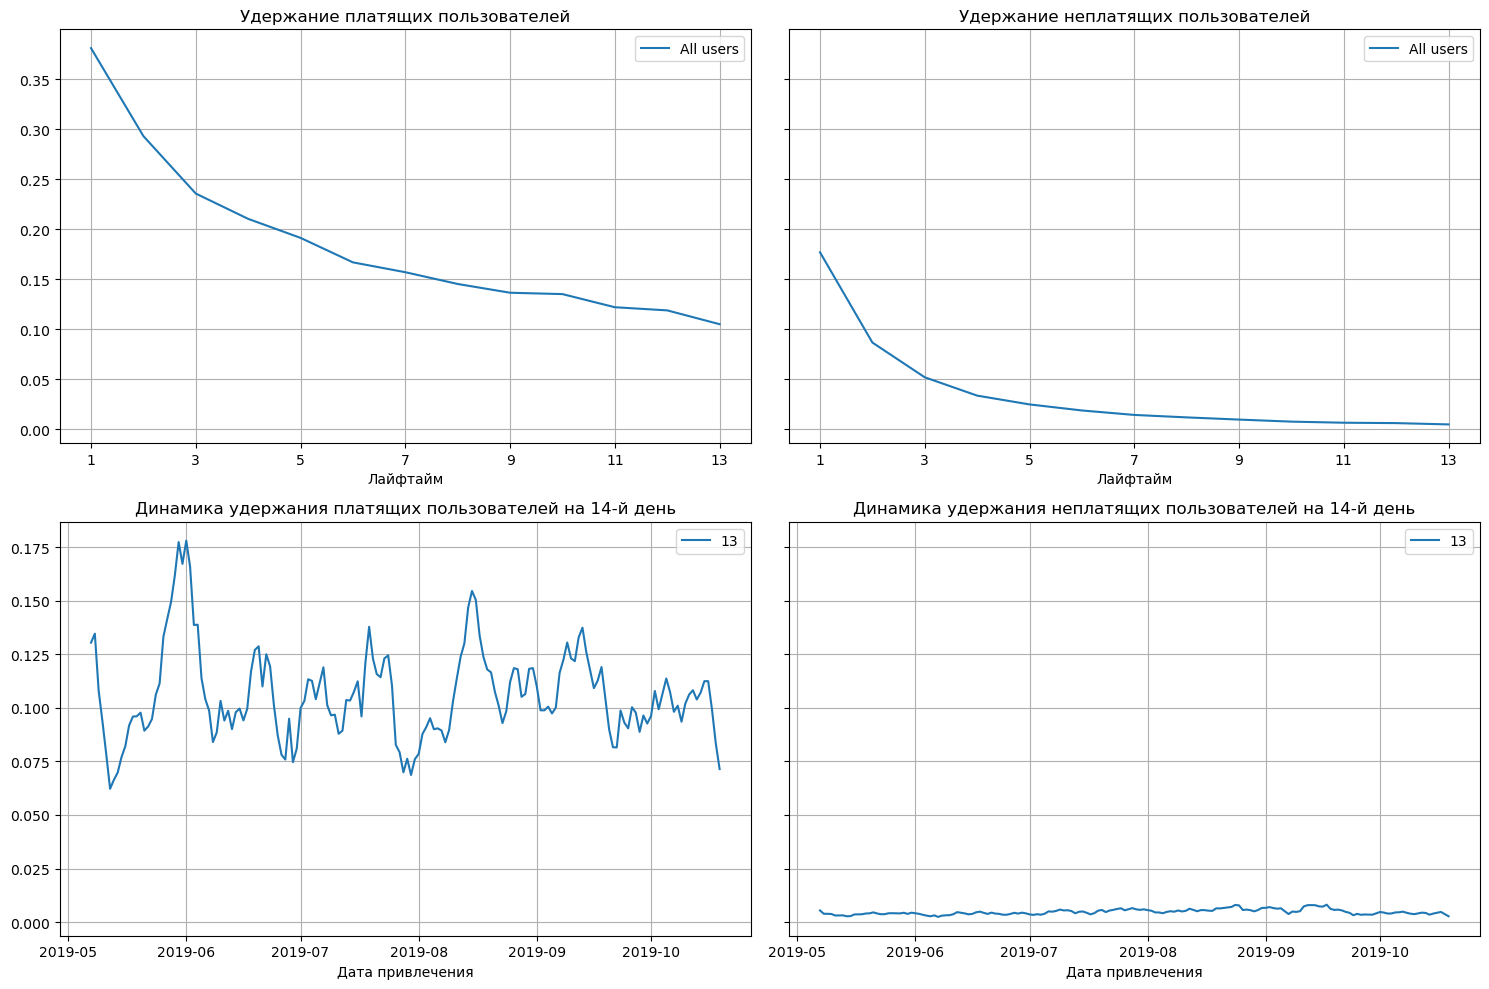

In [51]:
# смотрим удержание по пользователям

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Результаты удержания пользователей намного ниже, чем конверсия.

Показатели по платящим пользователям резко снижаются, динамика удержания так же летит вниз и имеет динамичное движение линии.
Показатели по неплатящим пользователям так же уменьшаются, но динамика более ровная, что говорит о том, что удержание пользователей в этой категории проходит плавнее, без резких скачков в отличии от тех пользователей, котороые совершают покупки.

#### 5.3 Окупаемость рекламы с разбивкой по устройствам

Проанализирем окупаемость рекламы с разбивкой по устройствам и построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

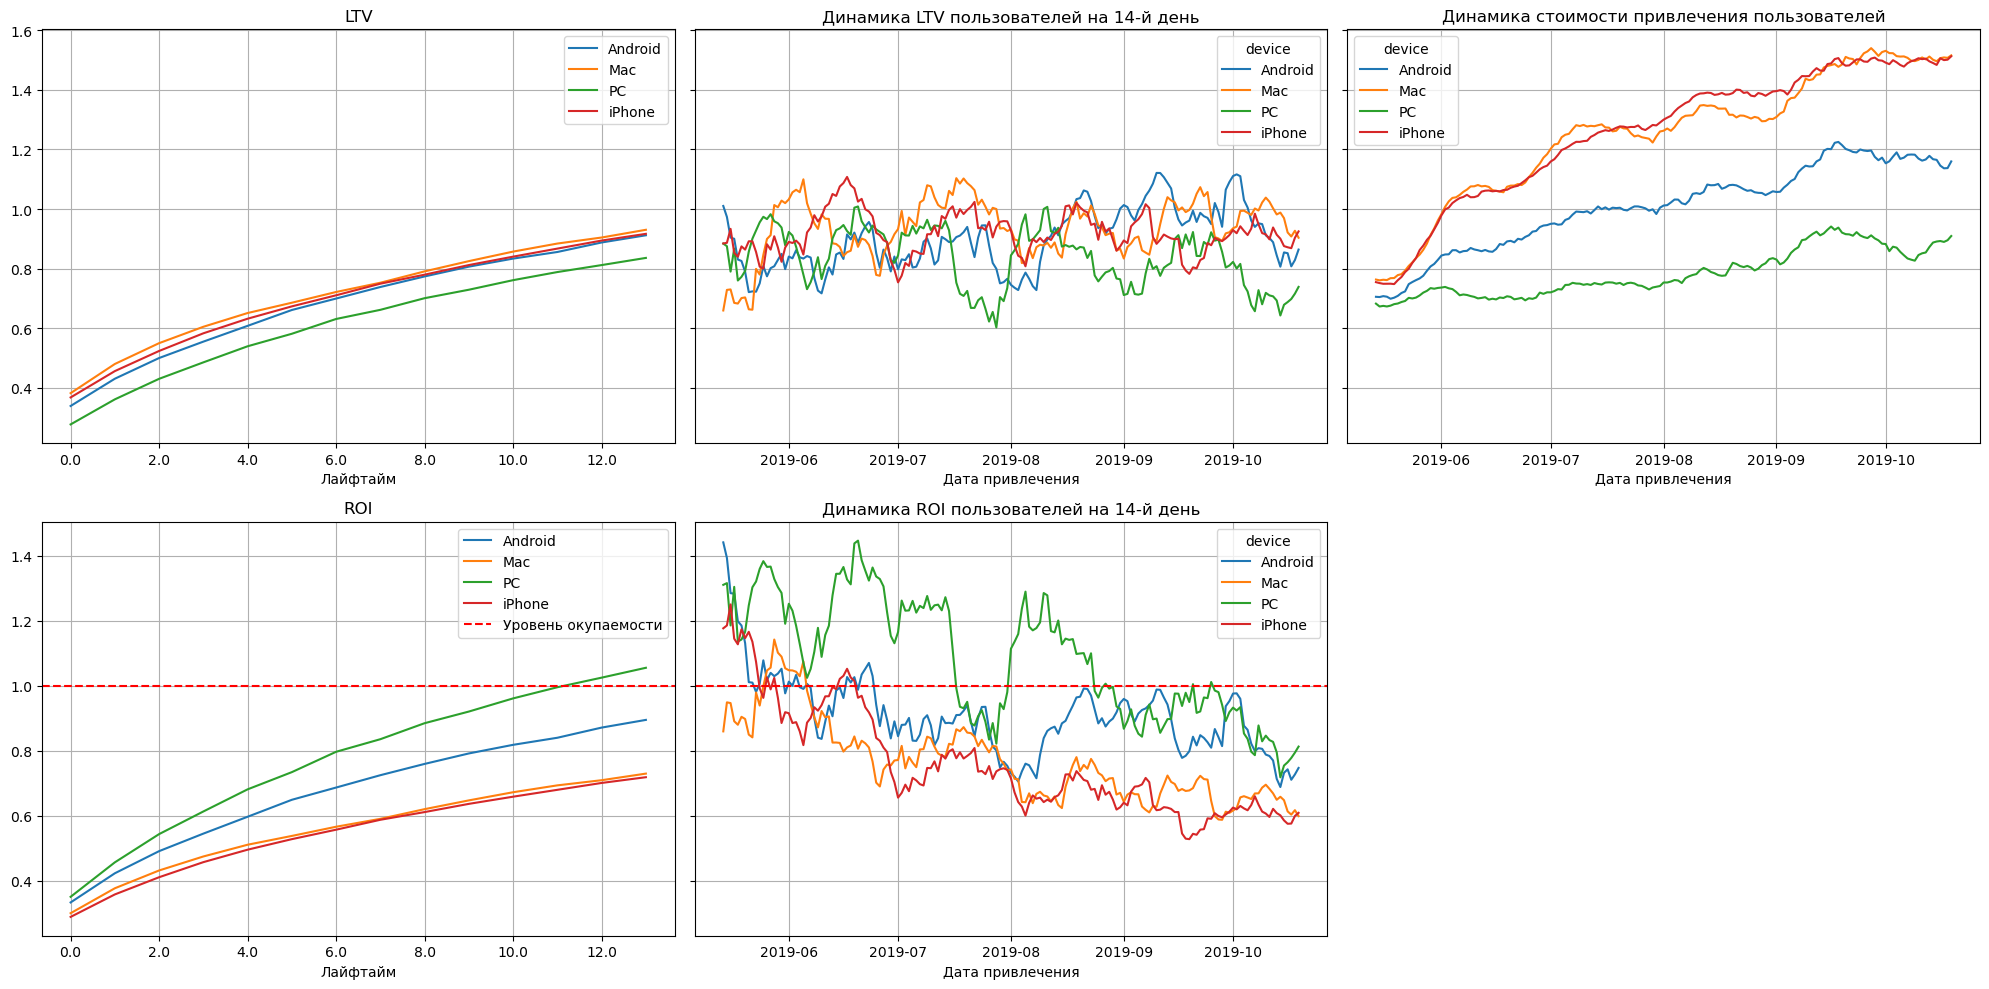

In [52]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графику ROI можно заметить, что окупаются только пользователи PC, а устройства Android, Mac и iPhone находятся за чертой окупаемости.
При этом показатель LTV по пользователям PC показывает, что они приносят меньше всего денег компании, в то время как показатели LTV  у пользователей Android, Mac и iPhone выше и они не переходят черту окупаемости в графике ROI.

Изменение во времени: Динамика CAC отражает, как изменяются затраты на привлечение клиентов с течением времени. Она может показывать как сезонные колебания (например, пиковые продажи в праздничные периоды), так и долгосрочные тренды.

Динамика CAC увеличивается, это говорит о том, что  затраты на привлечение клиентов увеличиваются, так же на этот показатель влияют неэффективность маркетинговых кампаний, сезонный фактор или конкуренция, когда компания вынуждена тратить больше бюджета на рекламу. 

#### 5.4 Окупаемость рекламы с разбивкой по странам

Проанализируем окупаемость рекламы с разбивкой по странам, а так же построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

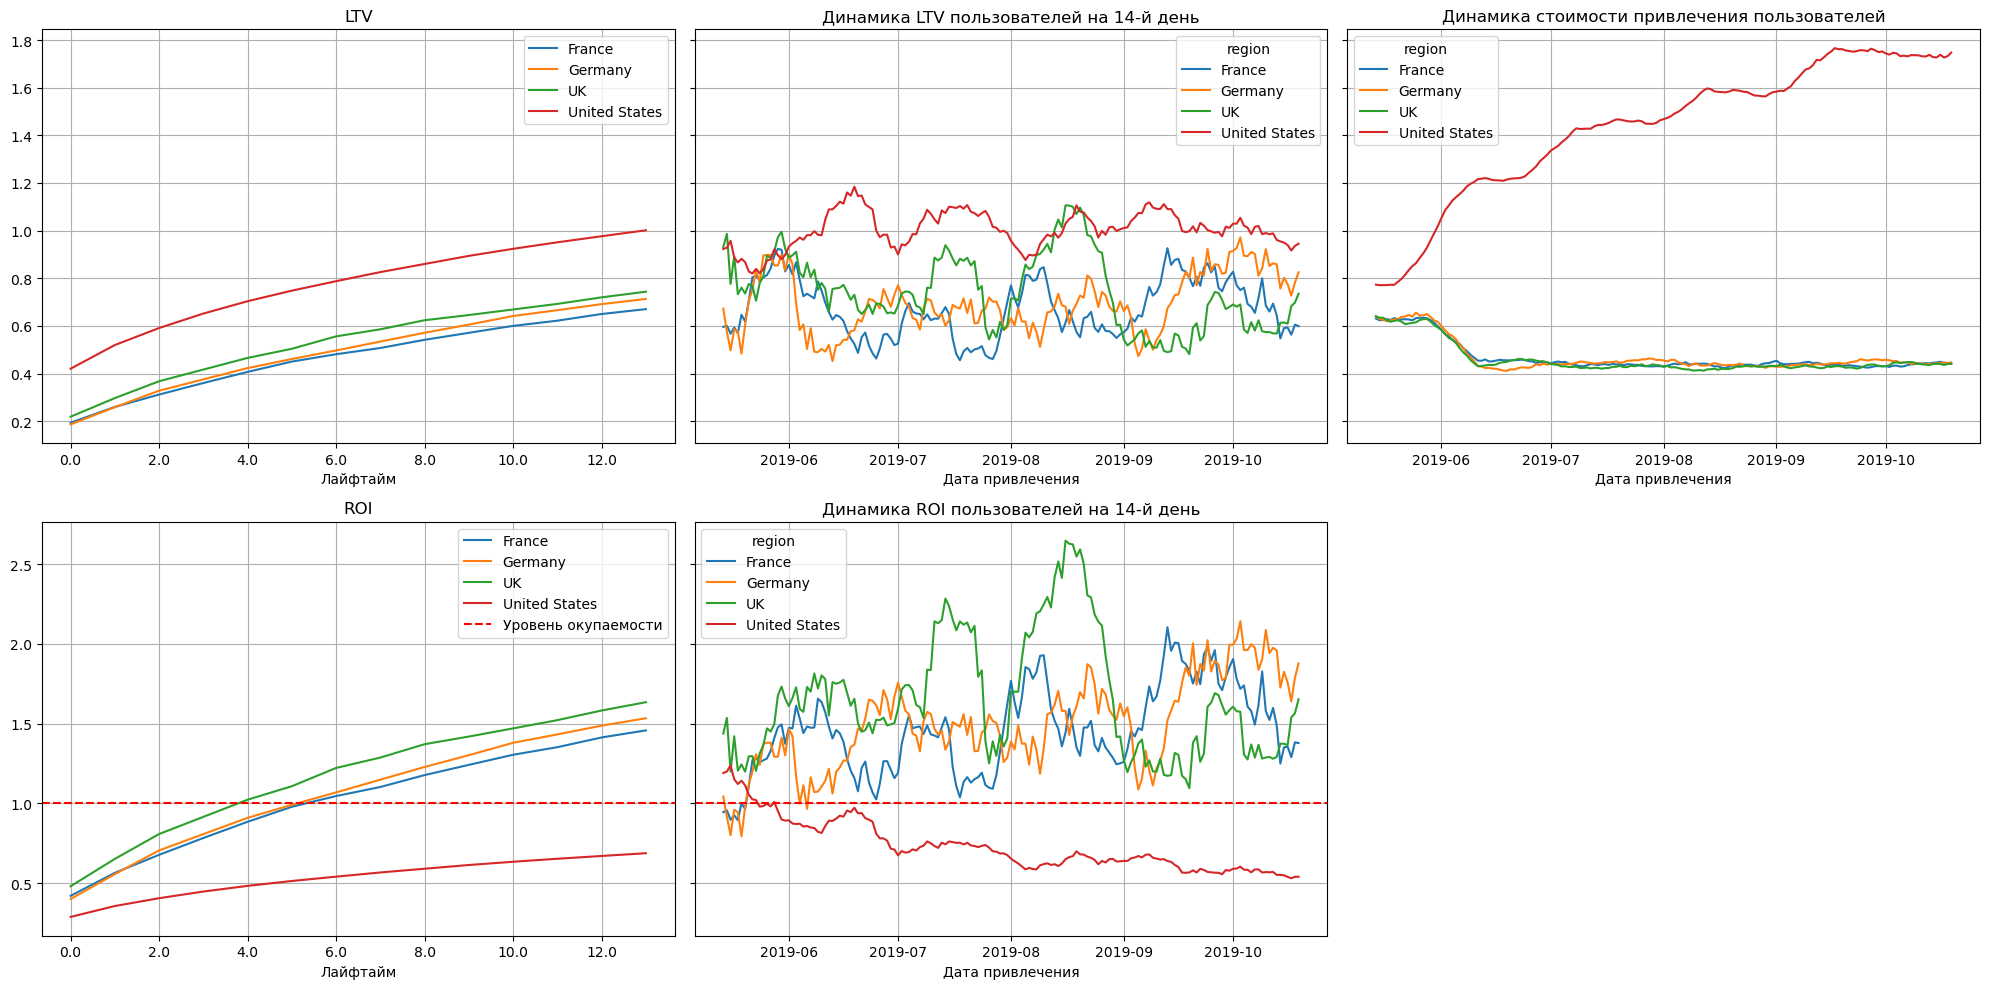

In [53]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

ROI по странам показывает, что три страны окупаются, это Франция, Германия и Великобритания, США - убыточная страна и находится за линией окупаемости.
При этом значение LTV у США намного выше, чем у других трех стран.
Динамика стоимости привлечения пользователей говорит о том, что самые высокие затраты на привлечение клиента у США, но этих затрат не хватает, чтобы выйти даже в ноль, поэтому показатель САС по этой стране растет.
У других трех стран этот показатель снижается, что говорит о том, что перейдя черту окупаемости, затраты нмаркетинговые кампании стали постепенно уменьшаться.

Поскольку выше мы видим, что основная проблема на рынке `США`, то мы можем посмотреть данные для этого региона более детально. Узнаем, в чём причина: в низкой конверсии или низком удержании.
Посчитаем и визуализируем конверсию, вызвав функции `get_conversion()` и `plot_conversion()`.

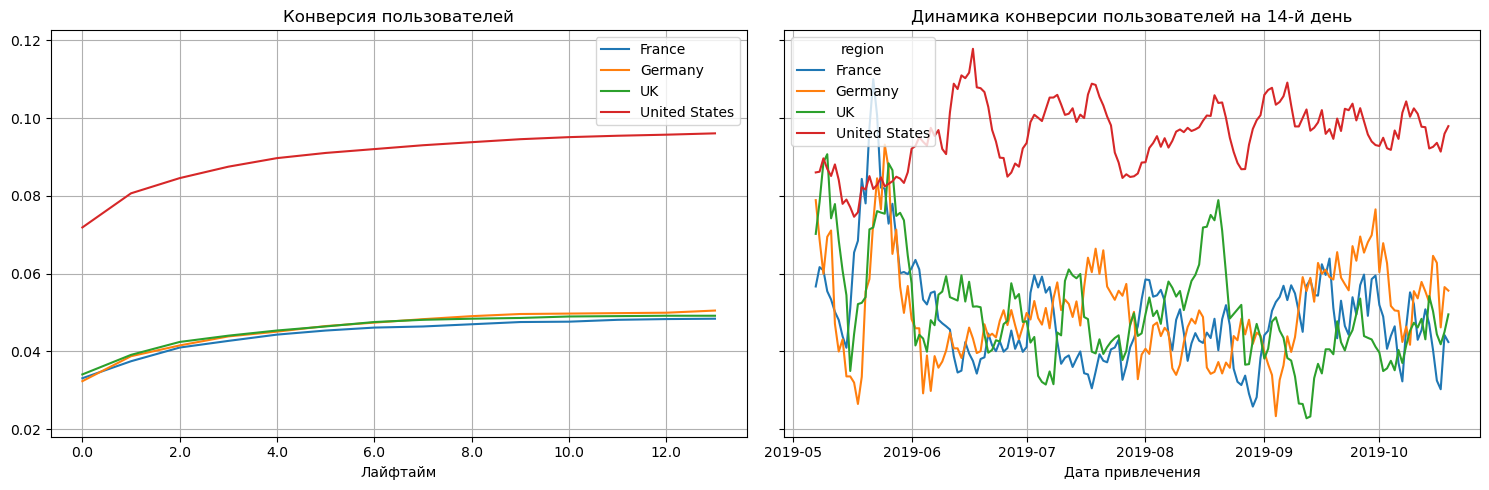

In [54]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Судя по графикам, пользователи из региона США конвертируются довольно хорошо и постоянно, об этом говорит высокий уровень конверсии и ее динамика на увеличение. 
Видимо, дело в удержании. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

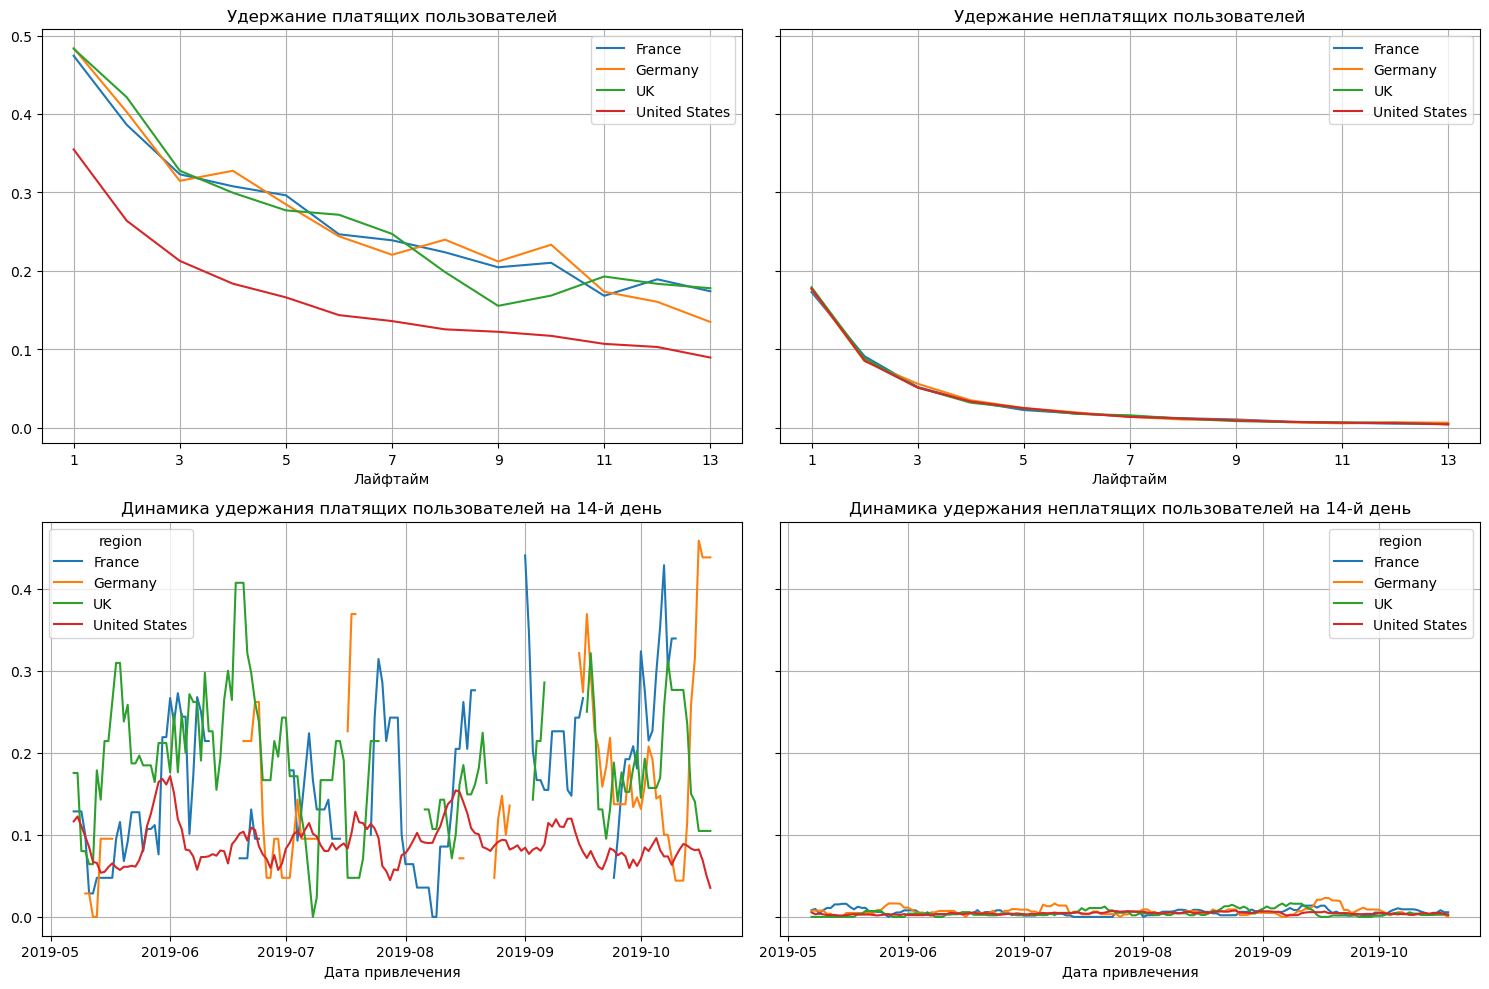

In [55]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Действительно, пользователи из США стабильно плохо удерживаются. Для платящих пользователей из США удержание практически в два раза ниже, чем у пользователей из других стран, это очень низкий показатель.

Скорее всего, для этого региона маркетингвая кампания неэффективна и в дальнейшем ее нужно пересмотреть.

#### 5.5 Окупаемость рекламы с разбивкой по рекламным каналам

Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам, а так же построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

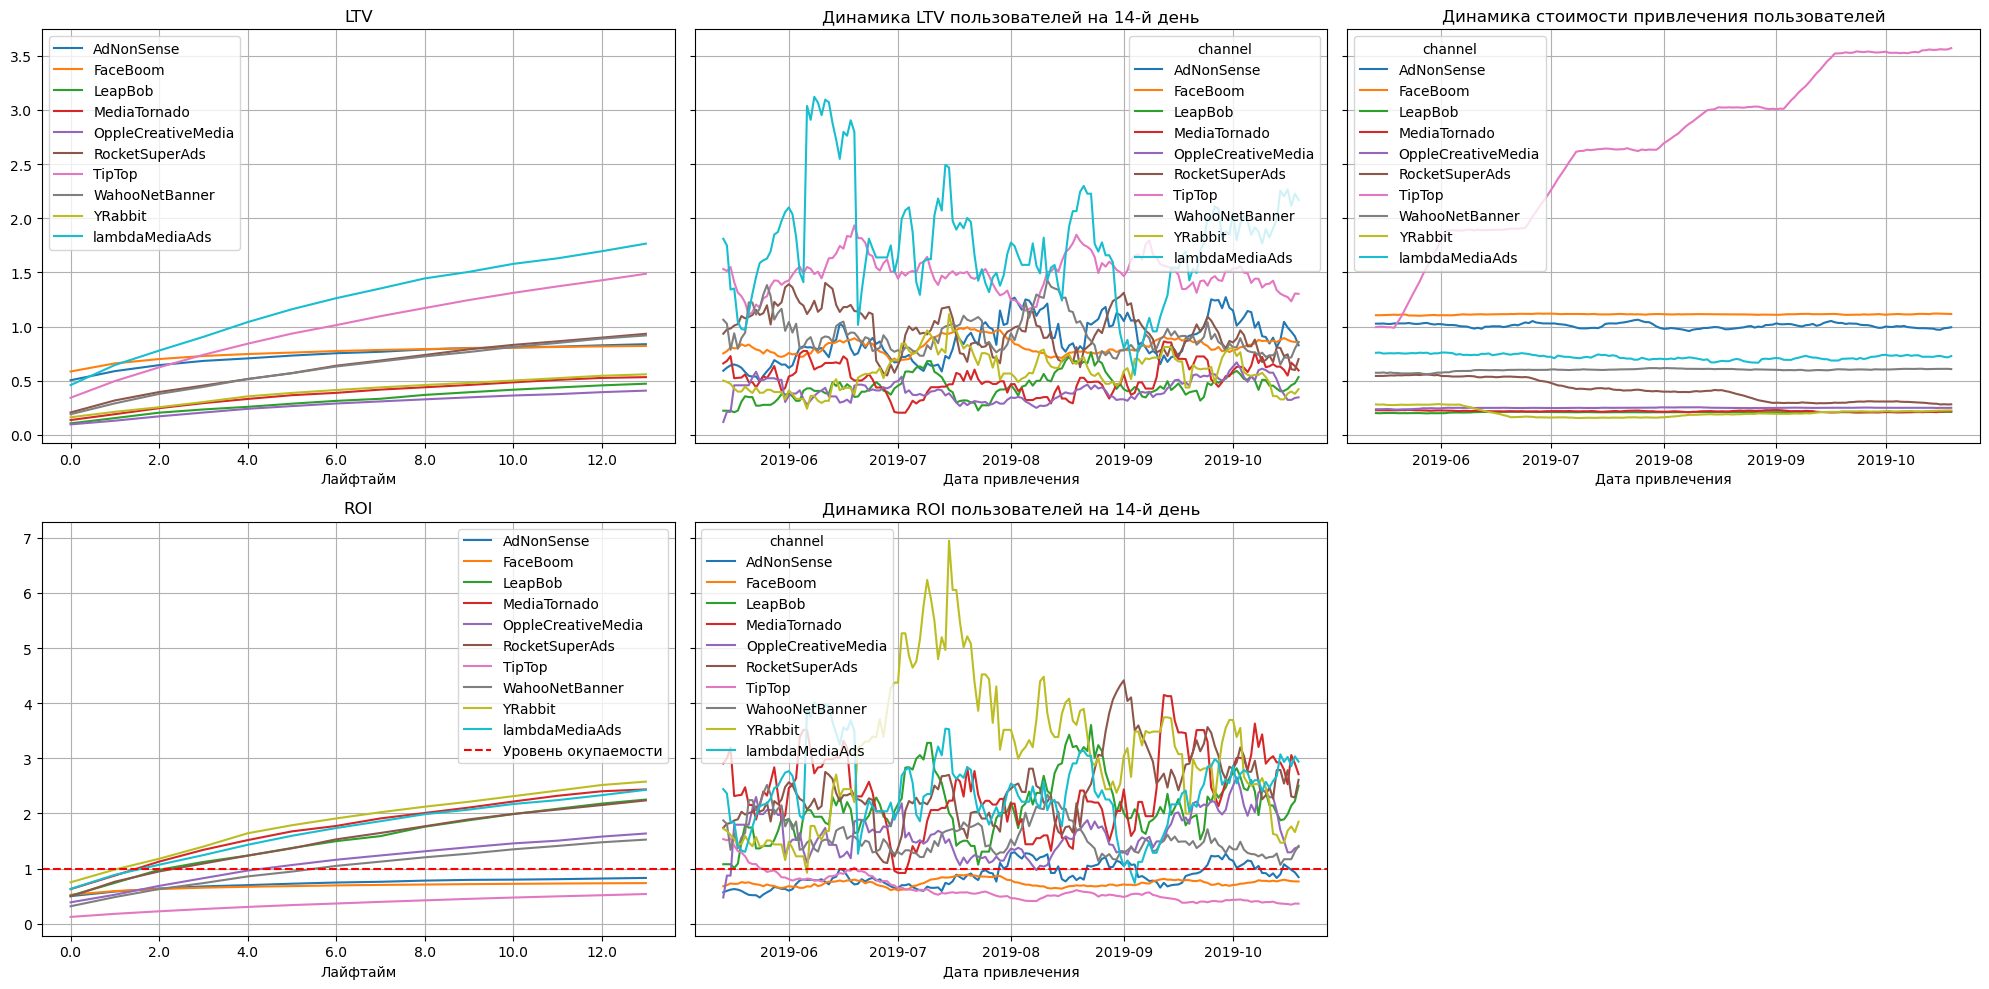

In [56]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Итак, линию окупаемости пересекают все каналы кроме самых популярных и многочисленных - TipTop, FaceBoom и AdNonSense, при этом у канала TipTop высокий LTV и высокая степень привлечения пользователей, это говорит о том, что затраты на маркетинг привышают доходы по данному каналу, соответственно компания терпит убытки.
У канала FaceBoom весьма стабильный САС, но при этом канал не выходит даже в ноль, а по каналу AdNonSense расходы на маркетинг стали постепенно уменьшаться, поэтому канал не может пересечь линию окупаемости.

Построим графики конверсии и удержания для рекламных каналов, чтобы разобраться с убытками по самым дорогим каналам - TipTop и FaceBoom.

Посчитаем и визуализируем конверсию, вызвав функции get_conversion() и plot_conversion().

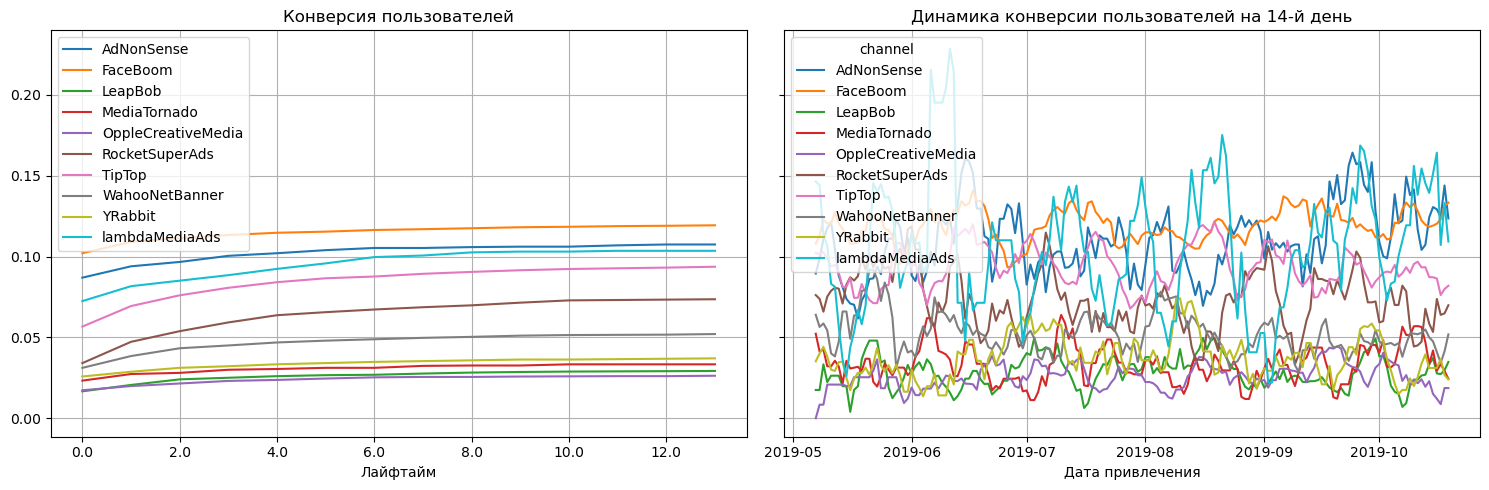

In [57]:
# смотрим конверсию с разбивкой по каналам

dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графикам видно, что эти два канала конвертируются хорошо, с показателями все в норме.
Теперь проверим, как дела обстоят с удержанием. Вызовем функции get_retention() и plot_retention(), чтобы рассчитать и отразить на графиках этот показатель.

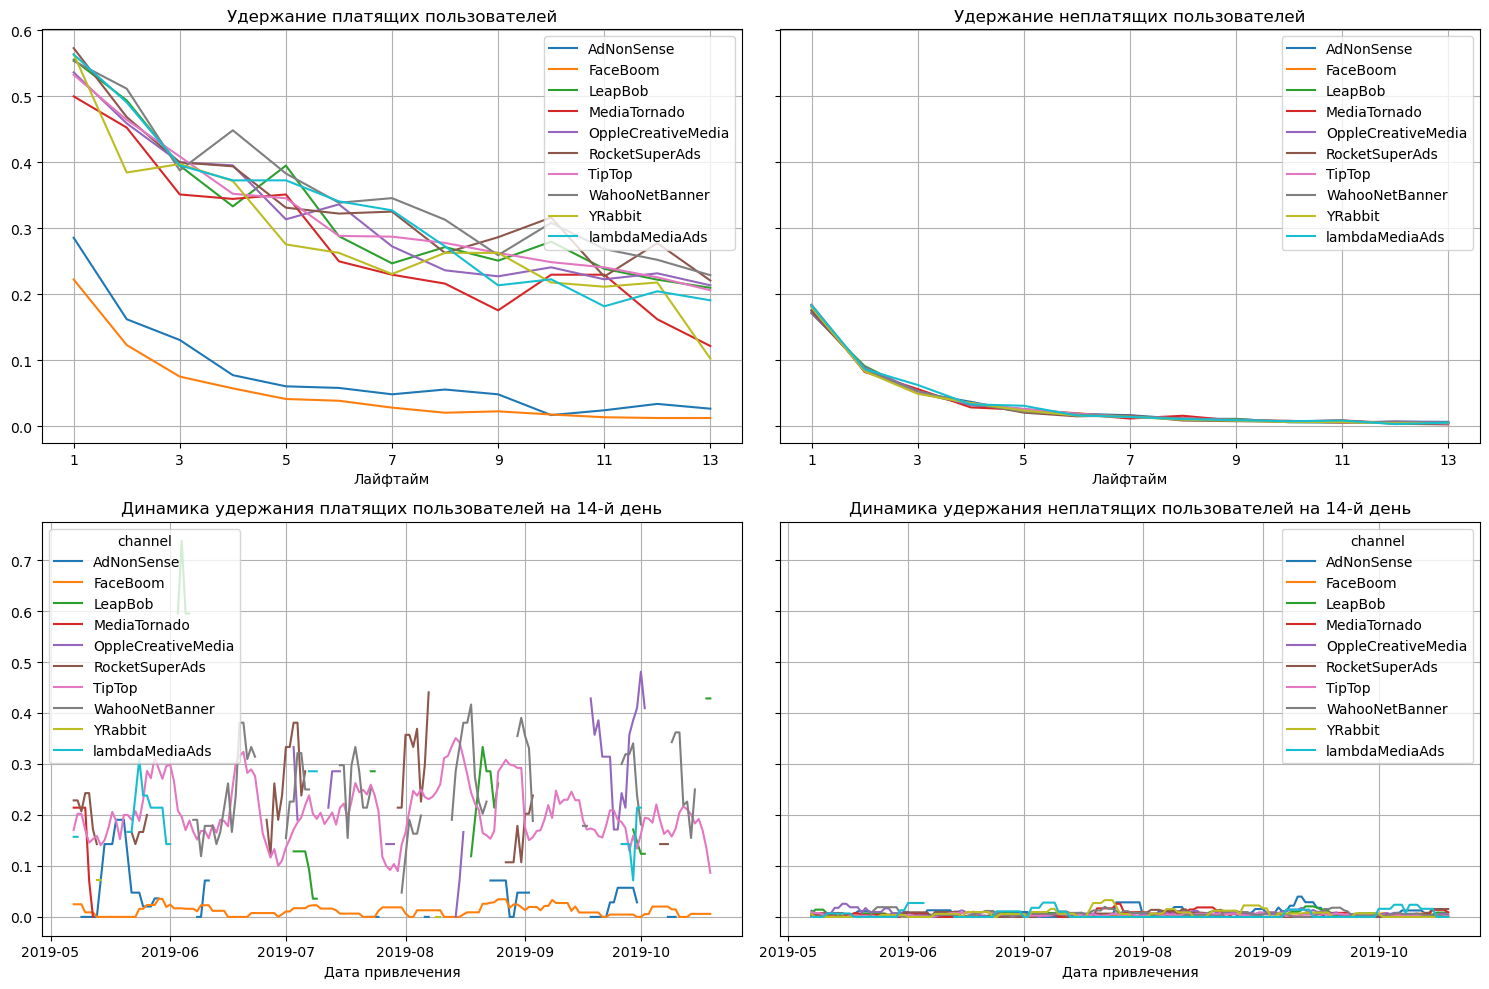

In [58]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Итак, удержание у канала TipTop более менее стабильное, а значит неокупаемость связана с ростом затрат из-за увеличения стоимости привлечения пользователя на фоне стабильного показателя LTV.

У канала FaceBoom ситуация немного иная, показатель удержания платящих пользователей самый низкий среди всех каналов, можно даже сказать, что он практически на одном уровне с показателем неплатящих пользователей. Это означает, что пользователи данного канала столкнулись с технической неисправностью приложения и не могут совершать покупки.

#### 5.5 Окупаемость рекламы, вывод

Итак, подведем итоги **пятого шага** исследования, а так же ответим на вопросы:

**Окупается ли реклама, направленная на привлечение пользователей в целом?**

Несовсем, по графикам окупаемости рекламы LTV, ROI и CAC можно сделать вывод, LTV меньше CAC, а это может сигнализировать о проблемах с окупаемостью.
Так же удержание платящих клиентов имеет отрицательную динамику.

**Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**

Устройства Android, Mac и iPhone находятся за чертой окупаемости, показатели САС по этим девайсам растут вверх, при этом общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок на данных девайсах меньше, чем расходы на пользователя.

Страна с окупаемостью ниже нуля - США, так же эта страна имеет самые высокие затраты на привлечение клиентов, а уровень САС выше LTV, что говорит о том, что показатели по этой стране убыточны.

Самые популярные и многочисленные каналы, такие как TipTop и FaceBoom оказались убыточными, ROI по этим каналам проходит за линией окупаемости, это говорит о том, расходы на рекламу превышают доход с каналов.


**Чем могут быть вызваны проблемы окупаемости?**

Проблемы с окупаемостью маркетиговых кампаний вызваны следующими факторами:

- Высокие затраты на привлечение клиентов и использование дорогих рекламных каналов, по графикам, приведенным выше, можно заметить очень высокий уровень САС, который имеет положительную динамику. Так же проведение неэффективных маркетинговых кампаний привели к высоким затратам (например, убыточные каналы TipTop и FaceBoom имеют самые высокие затраты на рекламу).

- Уровень удержания клиентов канала FaceBoom самый низкий и имеет отрицательную динамику, это можно наблюдать на графиках, приведенных выше. Отрицательная динамика удержания клиентов так же влияет на снижение показателец LTV и соответственно на окупаемость.
Показатель удержания платящих пользователей канала FaceBoom практически на одном уровне с показателем неплатящих пользователей. Это означает, что пользователи данного канала столкнулись с технической неисправностью приложения и не могут совершать покупки.

- Неравномерное и неоптимальное распределение маркетинговых бюджетов между разными каналами приводит к снижению окупаемости, это было хорошо видно на графиках динамики стоимости привлечения клиентов, где затраты были разбросаны между каналами неравномерно.

- Пользователи из США стабильно плохо удерживаются. Для платящих пользователей из США удержание практически в два раза ниже, чем у пользователей из других стран.

**Промежуточные рекомендации для рекламного отдела**

- Провести анализ рекламных каналов, возможно, стоит отказаться от дорогостоящих рекламных каналов, которые не приносят прибыли компании, но требуют больших рекламных затрат

- Провести анализ конкурентов и анализ стоимости продукции и услуг, может быть стоит увеличить стоимость продукта для увеличения показателя LTV

- Провести анализ целевой аудитории, возможно, привлекается нецелевая аудитория, которой неинтересно приложение, поэтому растут затраты, но сумма денег, которую клиент приносит компании не увеличивается.

- Провести оптимизацию распределения маркетингового бюджета между каналами привлечения

- Выяснить нет ли каки-то технических неполадок в приложении

- Пересмотреть ведение маркетинговых кампания, например, для региона США. по которому самое низкое удержание клиентов.

### Шаг 6. Общие выводы

**Подведем итоги всех шагов исследования анализа бизнес-показателей приложения Procrastinate Pro+**

**В первом пункте** были изучены данные и выполнена их предобработка. 

Для удобства переименовали следующие столбцы:
- столбцы датафрейма visits из User Id, Session Start, Session End в user_id, session_start, session_end
- столбцы датафрейма orders из User, Event в user_id, event_Dt

Так же названия всех столбцов в трех датафремах были приведены к нижнему регистру.

Изменили некорректные типы данных:
- в датафрейме visits колонку 'user_id' из типа int преобразовали в object, а колонки 'session_start' и 'session_end' из типа oblect в тип даты
- в датафрейме orders изменили тип данных в колонке user_id с int в object, в колонке event_Dt прописали корректный тип даты
- в датафреме costs колонку 'dt' привели к формату даты


**Во втором пункте** прописали функции для вычисления значений метрик и функции для построения графиков, к которым мы обращались в последующих шагах три, четыре и пять исследования.

**В третьем пункте** был проведен исследовательский анализ данных, в котором выявили следующее:

- количество пользователей равно 150008
- минимальная дата привлечения пользователей: 2019-05-01 00:00:41
- максимальная - 2019-10-27 23:59:04
- чаще всего пользователи приходили из источника organic - 56439 , а реже всего из lambdaMediaAds - 2149 пользователя

Так же были проанализированы следующие профили пользователей приложения: 

- Профили платящих пользователей по странам (первое место среди доли платящих пользователей занимает США с долей 0.069019, а последнее место заняла Франция с долей в два раза меньше -  0.037994)

- Профили платящих пользователей по типу устройства (доля платящих пользователей приходится на девайсы компании Apple, а именно на Mac - 0.063644 и iPhone - 0.062079, две последнии строчки занимают девайсы Android и PC)

- Профили платящих пользователей по источнику привлечения (наибольшая доля у  FaceBoom - 0.122049, а наименьшея доля у organic -  0.020553 и OppleCreativeMedia - 0.027077)

**В четвертом пункте** рассчитывали маркетинговые расходы, их сумма равна - 105497. Так же выяснили, что самый дорогой канал - TipTop, на его долю приходится 54751.30, а самый малозатратный YRabbit - 944.22. Все затраты по каналам распределны крайне неравномерно.

Месячный график динамиков изменения расходов во времени показал, что расходы у TipTop и FaceBoom с мая по сентябрь были практически на одном уровне, а в сентяборе начали резко снижаться. Расходы на остальные каналы в 3-4 раза меньше.
На недельном граифке можно заметить, что с нелевой по 20-ю неделю был резкий скачок по тратам, далее траты были на однои уровне, а с 40-й недели расходы начали падать.

Сформировали таблицу сас с средней стоимсотью привлечения одного пользователья, где самый дорогой канал - это TipTop, а канал, на который уходит наименьший расход на рекламу - это LeapBob. 

**В пятом пункте** провели оценку окупаемости рекламы и выяснили, что реклама, направленная на привлечение пользователей в целом не окупается, так как LTV меньше CAC, что сигнализирует о проблемах с окупаемостью, а так же удержание платящих клиентов имеет отрицательную динамику.

Выяснили, какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы: 

- Устройства Android, Mac и iPhone находятся за чертой окупаемости, показатели САС по этим девайсам растут вверх, при этом общая сумма денег, которую один клиент в среднем приносит компании со всех своих покупок на данных девайсах меньше, чем расходы на пользователя.

- Самая убыточная страна -  США, имеющая самые высокие затраты на привлечение клиентов, а уровень САС выше LTV, что говорит о том, что  показатели по этой стране убыточны, в отличии от Стран Европы и Великобритании.

- Самые популярные и многочисленные каналы TipTop, FaceBoom и AdNonSense оказались убыточными, ROI по этим каналам проходит за линией окупаемости, это говорит о том, расходы на рекламу превышают доход с каналов.


**Выяснили, чем могут быть вызваны проблемы окупаемости и неэффективности привлечения пользователей.**

- Высокие затраты на привлечение клиентов и использование дорогих рекламных каналов , по графикам, приведенным выше, можно заметить очень высокий уровень САС, который имеет положительную динамику. Так же проведение неэффективных маркетинговых кампаний привели к высоким затратам.
(например, убыточные каналы TipTop и FaceBoom имеют самые высокие затраты на рекламу)

- Возможнно, стоимость продукта невысока, поэтому уровень САС выше, чем LTV, это делает окупаемость проблематичной. 

- Уровень удержания клиентов низок и имеет отрицательную динамику, это можно наблюдать на графиках в пункте 5.2. Отрицательная динамика удержания клиентов так же влияет на снижение показателец LTV и соответственно на окупаемость. Например, низкое удержание у пользователей из региона США.

- Неравномерное и неоптимальное распределение маркетинговых бюджетов между разными каналами приводит к снижению окупаемости, это было хорошо видно на графиках динамики стоимости привлечения клиентов, гдде затраты были разбросаны между каналами неравномерно.

- Технические неполадки, которые отразились на показателях удержания канала FaceBoom, у которого показатель удержания практически на одном уровне с показателем неплатящих пользователей. Это означает, что пользователи данного канала столкнулись с технической неисправностью приложения и не могут совершать покупки.


**Рекомендации для рекламного отдела**

Для эффективной работы маркетинговых кампаний рекомендуется следующее:

- Провести анализ рекламных каналов, возможно, стоит отказаться от дорогостоящих рекламных каналов таких как TipTop и FaceBoom, которые не приносят прибыли компании, но требуют больших рекламных затрат.

- Провести анализ конкурентов и анализ стоимости продукции и услуг, может быть стоит увеличить стоимость продукта для увеличения показателя LTV

- Провести оптимизацию распределения маркетингового бюджета между каналами привлечения, так как сейчас распределение маркетинговых расходов на каналах лежит крайне неравномерно.

- Пересмотреть ведение маркетинговых кампаний, например, для региона США, по которому самое низкое удержание клиентов.

- Выяснить нет ли каки-то технических неполадок в приложении, которые влияют на удержание пользователей канала FaceBoom.

Данные рекомендации помогут компании выйти в плюс.